In [0]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score

In [0]:
df = pd.read_csv("train.csv")
#df.describe()

In [0]:
y = df['Label']
X = df.drop(columns=['Id', 'Label'])
X.shape

(60000, 784)

In [0]:
#X.describe()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 43, random_state = 42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

print(pca_train.shape, pca_train.shape) 

(48000, 43) (48000, 43)


In [0]:
c = [1, 5, 10, 15, 20]
scores = list()
times = list()
for i in c:
  print(i)
  start = time.time()
  clf = svm.SVC(C = i, random_state= 42, kernel = 'rbf', verbose = True)
  clf.fit(pca_train, y_train)
  end = time.time()
  y_pred1 = clf.predict(pca_test)
  score = accuracy_score(y_test, y_pred1)
  scores.append(score)
  times.append(end - start)
  print("\t", i, "Time = ", end - start, "Score = ", score)

1
[LibSVM]	 1 Time =  70.54258489608765 Score =  0.8785833333333334
5
[LibSVM]	 5 Time =  61.99803948402405 Score =  0.8900833333333333
10
[LibSVM]	 10 Time =  64.42771792411804 Score =  0.89575
15
[LibSVM]	 15 Time =  66.48743343353271 Score =  0.8974166666666666
20
[LibSVM]	 20 Time =  70.33054685592651 Score =  0.8965


In [0]:
c = [0.1, 0.5, 25, 30, 35]
scores = list()
times = list()
for i in c:
  print(i)
  start = time.time()
  clf = svm.SVC(C = i, random_state= 42, kernel = 'rbf', verbose = True)
  clf.fit(pca_train, y_train)
  end = time.time()
  y_pred1 = clf.predict(pca_test)
  score = accuracy_score(y_test, y_pred1)
  scores.append(score)
  times.append(end - start)
  print("\t", i, "Time = ", end - start, "Score = ", score)

0.1
[LibSVM]	 0.1 Time =  109.13908004760742 Score =  0.8414166666666667
0.5
[LibSVM]	 0.5 Time =  81.13229870796204 Score =  0.871
25
[LibSVM]	 25 Time =  76.81404638290405 Score =  0.8966666666666666
30
[LibSVM]	 30 Time =  78.47057223320007 Score =  0.8953333333333333
35
[LibSVM]	 35 Time =  82.84869384765625 Score =  0.8948333333333334


In [0]:
c = [11, 12, 13, 14]
scores = list()
times = list()
for i in c:
  print(i)
  start = time.time()
  clf = svm.SVC(C = i, random_state= 42, kernel = 'rbf', verbose = True)
  clf.fit(pca_train, y_train)
  end = time.time()
  y_pred1 = clf.predict(pca_test)
  score = accuracy_score(y_test, y_pred1)
  scores.append(score)
  times.append(end - start)
  print("\t", i, "Time = ", end - start, "Score = ", score)

11
[LibSVM]	 11 Time =  66.67377495765686 Score =  0.8965833333333333
12
[LibSVM]	 12 Time =  66.29712009429932 Score =  0.8971666666666667
13
[LibSVM]	 13 Time =  67.94874501228333 Score =  0.8973333333333333
14
[LibSVM]	 14 Time =  67.60384178161621 Score =  0.8975


In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plotROC(y_actual, y_predi, C):
  n_classes = 5

  y_val = label_binarize(y_actual, classes = [0,1,2,3,4])
  y_pred = label_binarize(y_predi, classes = [0,1,2,3,4])

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  import itertools
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize = (10,6))
  plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.5f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

  colors = itertools.cycle(['aqua', 'pink', 'cornflowerblue', 'green', 'yellow'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=4,
             label='ROC curve of class {0} (area = {1:0.5f})'
             ''.format(i, roc_auc[i]))

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  strr = 'Multi-class Receiver Operating Characteristics (ROC) for C = ' + C
  plt.title(strr)
  plt.legend(loc="lower right")
  plt.show()



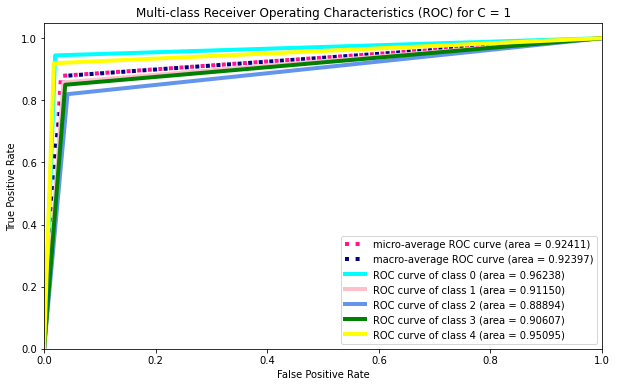

In [0]:
clf = svm.SVC(kernel='rbf', C = 1, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)
plotROC(y_test, y_pred1, "1")

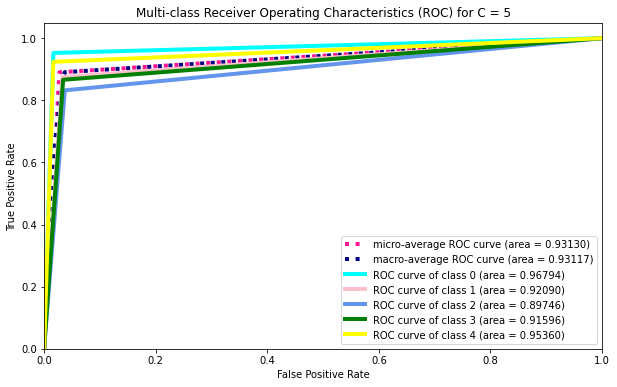

In [0]:
clf = svm.SVC(kernel='rbf', C = 5, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)
plotROC(y_test, y_pred1, "5")

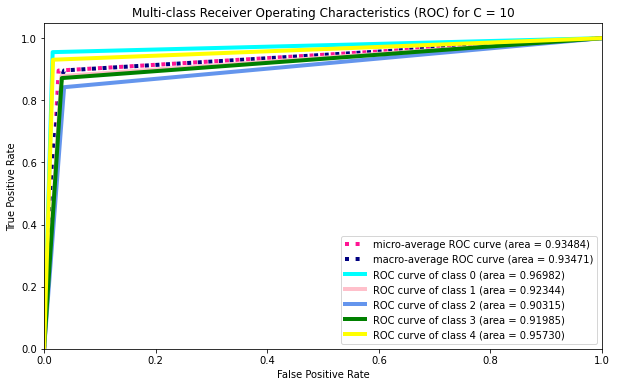

In [0]:
clf = svm.SVC(kernel='rbf', C = 10, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)
plotROC(y_test, y_pred1, "10")

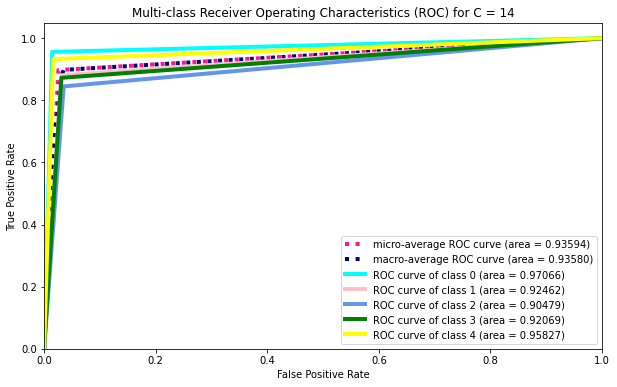

In [0]:
clf = svm.SVC(kernel='rbf', C = 14, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)
plotROC(y_test, y_pred1, "14")

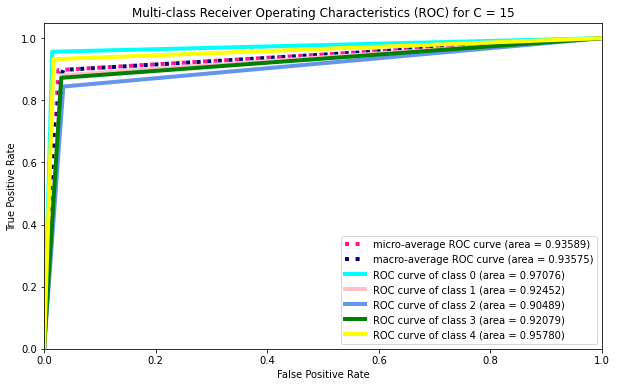

In [0]:
clf = svm.SVC(kernel='rbf', C = 15, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)
plotROC(y_test, y_pred1, "15")

In [0]:
clf = svm.SVC(kernel='rbf', C = 14, random_state=42)
clf.fit(pca_train, y_train)
y_pred1 = clf.predict(pca_test)

In [0]:
start = time.time()
clf = svm.SVC(kernel='linear', C = 1, random_state=42)
clf.fit(pca_train, y_train)
end = time.time()
print(end - start)
y_pred11 = clf.predict(pca_test)
print(accuracy_score(y_test, y_pred11))

In [0]:
start = time.time()
clf = svm.SVC(kernel='rbf', C = 1, random_state=42, gamma = 'auto')
clf.fit(pca_train, y_train)
end = time.time()
print(end - start)
y_pred11 = clf.predict(pca_test)
print(accuracy_score(y_test, y_pred11))

In [0]:
import time
start = time.time()
clf = svm.SVC(kernel='rbf', C = 14, random_state=42)
clf.fit(pca_train, y_train)
end = time.time()
print("Time taken to train = ", end - start)

Time taken to train =  70.82985091209412


In [0]:
start = time.time()
y_pred1 = clf.predict(pca_test)
end = time.time()
val = accuracy_score(y_test, y_pred1)
print("Time taken to predict test data = ", 
      end - start, " and accuracy is = ", val)

Time taken to predict test data =  15.96427583694458  and accuracy is =  0.8975


In [0]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, cohen_kappa_score, roc_auc_score

yhat_classes = y_pred1
rounded_labels = y_test
# np.argmax(y_test, axis=1)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(rounded_labels, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(rounded_labels, yhat_classes, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(rounded_labels, yhat_classes, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(rounded_labels, yhat_classes, average='micro')
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(rounded_labels, yhat_classes)
print('Cohens kappa: %f' % kappa)

Accuracy: 0.897500
Precision: 0.897500
Recall: 0.897500
F1 score: 0.897500
Cohens kappa: 0.871867


In [0]:
test = pd.read_csv("testX.csv")
test = test.drop(columns=['Id'])
test_trans = test
test_principalComponents = pca.transform(test_trans)
test_principalComponents.shape

(10000, 43)

In [0]:
start = time.time()
y_pred = clf.predict(test_principalComponents)
end = time.time()
print(end - start)

13.397304058074951


In [0]:
y_pred

array([4, 4, 1, ..., 3, 2, 2])

In [0]:
test = pd.read_csv('testX.csv')

In [0]:
id = test['Id']
len(id)

10000

In [0]:
import numpy as np

ans = np.column_stack((id, y_pred))
ans.shape

(10000, 2)

In [0]:
df_ans = pd.DataFrame(data=ans, columns=['Id', 'Label'])
df_ans.describe()

,Id,Label
count,10000.00000,10000.000000
mean,4999.50000,1.976000
std,2886.89568,1.417118
min,0.00000,0.000000
25%,2499.75000,1.000000
50%,4999.50000,2.000000
75%,7499.25000,3.000000
max,9999.00000,4.000000


In [0]:
df_ans.to_csv("samplesubmission.csv", index=False)